## Assignment 5
Max Norton  
ECON 628

In [283]:
using InstantiateFromURL
activate_github("QuantEcon/QuantEconLecturePackages", tag="v0.3.1");

In [284]:
using LinearAlgebra, Statistics, Compat

In [6]:
a = [10, 20, 30]

3-element Array{Int64,1}:
 10
 20
 30

In [8]:
a = [1.0, 2.0, 3.0]

3-element Array{Float64,1}:
 1.0
 2.0
 3.0

The REPL tells us that the arrays are of types `Array{Int64,1}` and `Array{Float64,1}` respectively

Here `Int64` and `Float64` are types for the elements inferred by the compiler

We’ll talk more about types later

The `1` in `Array{Int64,1}` and `Array{Any,1}` indicates that the array is
one dimensional (i.e., a `Vector`)

This is the default for many Julia functions that create arrays

In [9]:
typeof(randn(100))

Array{Float64,1}

In Julia, one dimensional vectors are best interpreted as column vectors, which we will see when we take transposes

We can check the dimensions of `a` using `size()` and `ndims()`
functions

In [10]:
ndims(a)

1

In [11]:
size(a)

(3,)

The syntax `(3,)` displays a tuple containing one element — the size along the one dimension that exists

#### Array vs Vector vs Matrix

In Julia, `Vector` and `Matrix` are just aliases for one- and two-dimensional arrays
respectively

In [13]:
Array{Int64, 1} == Vector{Int64}
#Array{Int64, 2} == Matrix{Int64}

true

Vector construction with `,` is then interpreted as a column vector

To see this, we can create a column vector and row vector more directly

In [14]:
[1, 2, 3] == [1; 2; 3] #both column vectors

true

In [15]:
[1 2 3] #a row vector is 2-dimensional

1×3 Array{Int64,2}:
 1  2  3

In [35]:
row = [1 2 3]
col = fill(undef, 3, 1)

3×1 Array{UndefInitializer,2}:
 array initializer with undefined values
 array initializer with undefined values
 array initializer with undefined values

In [38]:
typeof(undef)

UndefInitializer

In [32]:
@show size(row)
@show size(col)

size(row) = (1, 3)
size(col) = (3, 1)


(3, 1)

As we’ve seen, in Julia we have both

- one-dimensional arrays (i.e., flat arrays)  
- arrays of size `(1, n)` or `(n, 1)` that represent row and column vectors respectively  


Why do we need both?

On one hand, dimension matters when we come to matrix algebra

- Multiplying by a row vector is different to multiplication by a column vector  


On the other, we use arrays in many settings that don’t involve matrix algebra

In such cases, we don’t care about the distinction between row and column vectors

This is why many Julia functions return flat arrays by default


<a id='creating-arrays'></a>

### Creating Arrays

#### Functions that Create Arrays

We’ve already seen some functions for creating a vector filled with `0.0`

In [23]:
zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

This generalizes to matrices and higher dimensional arrays

In [24]:
zeros(2, 2)

2×2 Array{Float64,2}:
 0.0  0.0
 0.0  0.0

To return an array filled with a single value, use `fill`

In [25]:
fill(5.0, 2, 2)

2×2 Array{Float64,2}:
 5.0  5.0
 5.0  5.0

Finally, you can create an empty array using the `Array()` constructor

In [26]:
x = Array{Float64}(undef, 2, 2)

2×2 Array{Float64,2}:
 6.95227e-310  6.95227e-310
 6.95228e-310  0.0         

The printed values you see here are just garbage values

(the existing contents of the allocated memory slots being interpreted as 64 bit floats)

If you need more control over the types, fill with a non-floating point

In [27]:
fill(0, 2, 2) # fills with 0, not 0.0

2×2 Array{Int64,2}:
 0  0
 0  0

Or fill with a boolean type

In [28]:
fill(false, 2, 2) # produces a boolean matrix

2×2 Array{Bool,2}:
 false  false
 false  false

#### Creating Arrays from Existing Arrays

For the most part, we will avoid directly specifying the types of arrays, and let the compiler deduce the optimal types on its own

The reasons for this, discussed in more detail in [this lecture](generic_programming.ipynb#), are to ensure both clarity and generality

One place this can be inconvenient is when we need to create an array based on an existing array

First, note that assignment in Julia binds a name to a value, but does not make a copy of that type

In [39]:
x = [1, 2, 3]
y = x
y[1] = 2
x

3-element Array{Int64,1}:
 2
 2
 3

In the above, the `y = x` simply create a new named binding called `y` which refers to whatever `x` currently binds to

To copy the data, you need to be more explicit

In [40]:
x = [1, 2, 3]
y = copy(x)
y[1] = 2
x

3-element Array{Int64,1}:
 1
 2
 3

However, rather than making a copy of `x`, you may want to just have a similarly sized array

In [41]:
x = [1, 2, 3]
y = similar(x)
y

3-element Array{Int64,1}:
 281479271677952
 140711718551552
               0

Similar can also be used to pre-allocate a vector with a different size, but the same shape

In [42]:
x = [1, 2, 3]
y = similar(x, 4) # make a vector of length 4

4-element Array{Int64,1}:
 140715567613936
 140715663299984
 140715567612480
 140715567613936

Which generalized to higher dimensions

In [43]:
x = [1, 2, 3]
y = similar(x, 2, 2) # make 2x2 matrix

2×2 Array{Int64,2}:
 140715618909936  140715596221632
 140715617048336  140715583330256

#### Manual Array Definitions

As we’ve seen, you can create one dimensional arrays from manually specified data like so

In [47]:
a = [10, 20, 30, 40]
ndims(a)

1

In two dimensions we can proceed as follows

In [45]:
a = [10 20 30 40]  # two dimensional, shape is 1 x n

1×4 Array{Int64,2}:
 10  20  30  40

In [46]:
ndims(a)

2

In [25]:
a = [10 20; 30 40]  # 2 x 2

2×2 Array{Int64,2}:
 10  20
 30  40

You might then assume that `a = [10; 20; 30; 40]` creates a two dimensional column vector but this isn’t the case

In [48]:
a = [10; 20; 30; 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [49]:
ndims(a)

1

Instead transpose the matrix (or adjoint if complex)

In [50]:
a = [10 20 30 40]'

4×1 Adjoint{Int64,Array{Int64,2}}:
 10
 20
 30
 40

In [51]:
ndims(a)

2

### Array Indexing

We’ve already seen the basics of array indexing

In [52]:
a = [10 20 30 40]
a[end-1]

30

In [53]:
a[1:3]

3-element Array{Int64,1}:
 10
 20
 30

For 2D arrays the index syntax is straightforward

In [57]:
a = randn(2, 2)
a

2×2 Array{Float64,2}:
 -1.35916   1.29333
  0.309584  1.64104

In [58]:
a[1, :]  # First row

2-element Array{Float64,1}:
 -1.3591585836456466
  1.2933326597140298

In [59]:
a[:, 1]  # First column

2-element Array{Float64,1}:
 -1.3591585836456466
  0.3095835394895731

Booleans can be used to extract elements

In [60]:
a = randn(2, 2)

2×2 Array{Float64,2}:
 0.269194  -0.99979
 0.110867  -0.17094

In [61]:
b = [true false; false true]

2×2 Array{Bool,2}:
  true  false
 false   true

In [62]:
a[b]

2-element Array{Float64,1}:
  0.269194265333808 
 -0.1709404667028679

This is useful for conditional extraction, as we’ll see below

An aside: some or all elements of an array can be set equal to one number using slice notation

In [63]:
a = zeros(4)

4-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0

In [64]:
a[2:end] .= 42

3-element view(::Array{Float64,1}, 2:4) with eltype Float64:
 42.0
 42.0
 42.0

In [65]:
a

4-element Array{Float64,1}:
  0.0
 42.0
 42.0
 42.0

### Views and Slices

Using the `:` notation provides a slice of an array, copying the sub-array to a new array with a similar type

In [66]:
a = [1 2; 3 4]
b = a[:, 2]
@show b
a[:, 2] = [4, 5] # modify a
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [2, 4]


A `view` on the other hand does not copy the value

In [67]:
a = [1 2; 3 4]
@views b = a[:, 2]
@show b
a[:, 2] = [4, 5]
@show a
@show b;

b = [2, 4]
a = [1 4; 3 5]
b = [4, 5]


Note that the only difference is the `@views` macro, which will replace any slices with views in the expression

An alternative is to call the `view` function directly–though it is generally discouraged since it is a step away from the math

In [68]:
@views b = a[:, 2]
view(a, :, 2) == b

true

As with most programming in Julia, it is best to avoid prematurely assuming that `@views` will have a significant impact on performance, and stress code clarity above all else

Another important lesson about views is that they **are not** normal, dense arrays

In [69]:
a = [1 2; 3 4]
b_slice = a[:, 2]
@show typeof(b_slice)
@show typeof(a)
@views b = a[:, 2]
@show typeof(b);

typeof(b_slice) = Array{Int64,1}
typeof(a) = Array{Int64,2}
typeof(b) = SubArray{Int64,1,Array{Int64,2},Tuple{Base.Slice{Base.OneTo{Int64}},Int64},true}


The type of `b` is a good example of how types are not as they may seem

Similarly

In [71]:
a = [1 2; 3 4]
b = a' # transpose
@show b
typeof(b)

b = [1 3; 2 4]


Adjoint{Int64,Array{Int64,2}}

To copy into a dense array

In [74]:
a = [1 2; 3 4]
b = a' # transpose
c = Matrix(b) # convert to matrix
d = collect(b) # also `collect` works on any iterable
c == d
typeof(d)

Array{Int64,2}

### Special Matrices

As we saw with the `transpose`, sometimes types that look like matrices are not stored as a dense array

As an example, consider creating a diagonal matrix

In [75]:
d = [1.0, 2.0]
a = Diagonal(d)

2×2 Diagonal{Float64,Array{Float64,1}}:
 1.0   ⋅ 
  ⋅   2.0

As you can see, the type is `2×2 Diagonal{Float64,Array{Float64,1}}`, which is not a 2-dimensional array

The reasons for this are both efficiency in storage, as well as efficiency in arithmetic and matrix operations

For example, this both behaves (and is, in an important sense) like any other Matrix

In [77]:
@show 2a
b = rand(2,2)
@show b
@show b * a;

2a = [2.0 0.0; 0.0 4.0]
b = [0.491315 0.484766; 0.634845 0.0462025]
b * a = [0.491315 0.969532; 0.634845 0.0924049]


Another example is in the construction of an identity matrix, where a naive implementation is

In [78]:
2.0*.484766

0.969532

In [79]:
b = [1.0 2.0; 3.0 4.0]
b - Diagonal([1.0, 1.0]) # poor style, inefficient code

2×2 Array{Float64,2}:
 0.0  2.0
 3.0  3.0

Whereas you should instead use

In [80]:
b = [1.0 2.0; 3.0 4.0]
b - I # good style, and note the lack of dimensions of I

2×2 Array{Float64,2}:
 0.0  2.0
 3.0  3.0

While the implementation of `I` is a little abstract to go into at this point, a hint is that

In [81]:
typeof(I)

UniformScaling{Bool}

So that this is a `UniformScaling` type rather than an identity matrix, making it much more powerful and general

### Assignment and Passing Arrays

As discussed above, in Julia, the left hand side of an assignment is a “binding” or a label to a value

In [82]:
x = [1 2 3]
y = x # name y binds to whatever value `x` bound to

1×3 Array{Int64,2}:
 1  2  3

The consequence of this, is that you can re-bind that name

In [83]:
x = [1 2 3]
y = x # name y binds to whatever `x` bound to
z = [2 3 4]
y = z # just changes name binding, not value!
@show (x, y, z);

(x, y, z) = ([1 2 3], [2 3 4], [2 3 4])


What this means is that if `a` is an array and we set `b = a` then `a` and `b` point to exactly the same data

In the above, suppose you had meant to change the value of `x` to the values of `y`, you need to assign the values rather than the name

In [84]:
x = [1 2 3]
y = x # name y binds to whatever `x` bound to
z = [2 3 4]
y .= z # Now dispatches the assignment of each element
@show (x, y, z);

(x, y, z) = ([2 3 4], [2 3 4], [2 3 4])


Alternatively, you could have used `y[:] = z`

This applies to in-place functions as well

First, define a simple function for a linear map

In [85]:
function f(x)
    return [1 2; 3 4] * x # matrix * column vector
end
val = [1, 2]
f(val)

2-element Array{Int64,1}:
  5
 11

In general, these “out-of-place” functions are preferred to “in-place” functions, which modify the arguments

In [86]:
function f(x)
    return [1 2; 3 4] * x # matrix * column vector
end
val = [1, 2]
y = similar(val)
function f!(out, x)
    out .= [1 2; 3 4] * x
end
f!(y, val)
y

2-element Array{Int64,1}:
  5
 11

This demonstrates a key convention in Julia: functions which modify any of the arguments have the name ending with `!` (e.g. `push!`)

We can also see a common mistake, where instead of modifying the arguments, the name binding is swapped

In [57]:
function f(x)
    return [1 2; 3 4] * x # matrix * column vector
end
val = [1, 2]
y = similar(val)

function f!(out, x)
    out = [1 2; 3 4] * x # MISTAKE! should be .= or [:]
end
f!(y, val)
y

2-element Array{Int64,1}:
 114621648
         0

In [97]:
# What if we have an in-place function on a point variable (not an array)? Do we need to broadcast to modify the value rather than rebinding? Is there an important difference?

function update!(x)
    x[:] = 1
end

y=3
ndims(y)
y=4

4

In [90]:
x = 1
@show x
x = 3

x = 1


3

In [94]:
function walk!(x, paramsmn=[.2, 1.0])
    α=paramsmn[1]; σ=paramsmn[2];
    x = α*x + σ*randn()
end

x = 0
@show x
y = walk!(x)
@show x, y

x = 0
(x, y) = (0, 1.1188763651568536)


(0, 1.1188763651568536)

The frequency of making this mistake is one of the reasons to avoid in-place functions, unless proven to be necessary by benchmarking

Note that scalars are always immutable, such that

In [99]:
y = [1 2]
y .-= 2 # ie. y .= y .- 2, no problem

x = 5
# x .-= 2 # fails!
x = x - 2 # subtle difference: creates a new value and rebinds the variable

3

## Operations on Arrays

### Array Methods

Julia provides standard functions for acting on arrays, some of which we’ve
already seen

In [100]:
a = [-1, 0, 1]


@show length(a)
@show sum(a)
@show mean(a)
@show std(a) #standard deviation
@show var(a) # variance
@show maximum(a)
@show minimum(a)
@show extrema(a) # (mimimum(a), maximum(a))

length(a) = 3
sum(a) = 0
mean(a) = 0.0
std(a) = 1.0
var(a) = 1.0
maximum(a) = 1
minimum(a) = -1
extrema(a) = (-1, 1)


(-1, 1)

To sort an array

In [109]:
b = sort(a, rev = true)  # returns new array, original not modified

3-element Array{Int64,1}:
  1
  0
 -1

In [110]:
b = sort!(a, rev = true)  # returns *modified original* array

3-element Array{Int64,1}:
  1
  0
 -1

In [111]:
b == a  # tests if have the same values

true

In [112]:
b === a  # tests if arrays are identical (i.e share same memory)

true

### Matrix Algebra

For two dimensional arrays, `*` means matrix multiplication

In [113]:
a = ones(1, 2)

1×2 Array{Float64,2}:
 1.0  1.0

In [114]:
b = ones(2, 2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [115]:
a * b

1×2 Array{Float64,2}:
 2.0  2.0

In [116]:
b * a'

2×1 Array{Float64,2}:
 2.0
 2.0

To solve the linear system `A X = B` for `X` use `A \ B`

In [117]:
A = [1 2; 2 3]

2×2 Array{Int64,2}:
 1  2
 2  3

In [118]:
B = ones(2, 2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [119]:
A \ B

2×2 Array{Float64,2}:
 -1.0  -1.0
  1.0   1.0

In [121]:
B / A == A \ B

false

In [71]:
inv(A) * B

2×2 Array{Float64,2}:
 -1.0  -1.0
  1.0   1.0

Although the last two operations give the same result, the first one is numerically more stable and should be preferred in most cases

Multiplying two **one** dimensional vectors gives an error — which is reasonable since the meaning is ambiguous

```julia
ones(2) * ones(2)
```


If you want an inner product in this setting use `dot()` or the `` `unicode ``\dot<TAB>`

In [122]:
dot(ones(2), ones(2))

2.0

Matrix multiplication using one dimensional vectors is a bit inconsistent — pre-multiplication by the matrix is OK, but post-multiplication gives an error

In [123]:
b = ones(2, 2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [124]:
b * ones(2)

2-element Array{Float64,1}:
 2.0
 2.0

In [126]:
#ones(2) * b #error because ones(2) is treated as a column vector

ones(2)' * b #should work


1×2 Adjoint{Float64,Array{Float64,1}}:
 2.0  2.0

### Elementwise Operations

#### Algebraic Operations

Suppose that we wish to multiply every element of matrix `A` with the corresponding element of matrix `B`

In that case we need to replace `*` (matrix multiplication) with `.*` (elementwise multiplication)

For example, compare

In [127]:
ones(2, 2) * ones(2, 2)   # Matrix multiplication

2×2 Array{Float64,2}:
 2.0  2.0
 2.0  2.0

In [128]:
ones(2, 2) .* ones(2, 2)   # Element by element multiplication

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

This is a general principle: `.x` means apply operator `x` elementwise

In [129]:
A = -ones(2, 2)

2×2 Array{Float64,2}:
 -1.0  -1.0
 -1.0  -1.0

In [130]:
A.^2  # Square every element

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

However in practice some operations are mathematically valid without broadcasting, and hence the `.` can be omitted

In [131]:
ones(2, 2) + ones(2, 2)  # same as ones(2, 2) .+ ones(2, 2)

2×2 Array{Float64,2}:
 2.0  2.0
 2.0  2.0

Scalar multiplication is similar

In [132]:
A = ones(2, 2)

2×2 Array{Float64,2}:
 1.0  1.0
 1.0  1.0

In [133]:
2 * A  # same as 2 .* A

2×2 Array{Float64,2}:
 2.0  2.0
 2.0  2.0

In fact you can omit the `*` altogether and just write `2A`

Unlike matlab and other languages, scalar addition requires the `.+` in order to correctly broadcast

In [136]:
x = [1, 2]
x .+ 1 # i.e. not x + 1
x .- 1 # i.e. not x - 1

2-element Array{Int64,1}:
 0
 1

#### Elementwise Comparisons

Elementwise comparisons also use the `.x` style notation

In [139]:
a = [10, 20, 30]

3-element Array{Int64,1}:
 10
 20
 30

In [140]:
b = [-100, 0, 100]

3-element Array{Int64,1}:
 -100
    0
  100

In [152]:
all(b.>a) === (b>a)

true

In [153]:
a .== b

3-element BitArray{1}:
 false
 false
 false

We can also do comparisons against scalars with parallel syntax

In [154]:
b

3-element Array{Int64,1}:
 -100
    0
  100

In [155]:
b .> 1

3-element BitArray{1}:
 false
 false
  true

This is particularly useful for *conditional extraction* — extracting the elements of an array that satisfy a condition

In [159]:
a = randn(4)

4-element Array{Float64,1}:
 -0.41956952258592783
 -1.1768506200372393 
  0.4565292652065623 
 -0.10765310813216442

In [160]:
a .< 0

4-element BitArray{1}:
  true
  true
 false
  true

In [161]:
a[a .< 0]

3-element Array{Float64,1}:
 -0.41956952258592783
 -1.1768506200372393 
 -0.10765310813216442

#### Changing Dimensions

The primary function for changing the dimension of an array is `reshape()`

In [162]:
a = [10, 20, 30, 40]

4-element Array{Int64,1}:
 10
 20
 30
 40

In [163]:
b = reshape(a, 2, 2)

2×2 Array{Int64,2}:
 10  30
 20  40

In [164]:
b

2×2 Array{Int64,2}:
 10  30
 20  40

Notice that this function returns a “view” on the existing array

This means that changing the data in the new array will modify the data in the
old one:

In [165]:
b[1, 1] = 100  # Continuing the previous example

100

In [166]:
b

2×2 Array{Int64,2}:
 100  30
  20  40

In [167]:
a

4-element Array{Int64,1}:
 100
  20
  30
  40

To collapse an array along one dimension you can use `dropdims()`

In [168]:
a = [1 2 3 4]  # Two dimensional

1×4 Array{Int64,2}:
 1  2  3  4

In [169]:
dropdims(a, dims = 1)

4-element Array{Int64,1}:
 1
 2
 3
 4

The return value is an array with the specified dimension “flattened”

### Broadcasting Functions

Julia provides standard mathematical functions such as `log`, `exp`, `sin`, etc.

In [170]:
log(1.0)

0.0

By default, these functions act *elementwise* on arrays

In [173]:
log.(1:4)

4-element Array{Float64,1}:
 0.0               
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

Note that we can get the same result as with a comprehension or more explicit loop

In [174]:
[ log(x) for x in 1:4 ]

4-element Array{Float64,1}:
 0.0               
 0.6931471805599453
 1.0986122886681098
 1.3862943611198906

Nonetheless the syntax is convenient

### Linear Algebra

([See linear algebra documentation](https://docs.julialang.org/en/stable/manual/linear-algebra/))

Julia provides some a great deal of additional functionality related to linear operations

In [175]:
A = [1 2; 3 4]

2×2 Array{Int64,2}:
 1  2
 3  4

In [176]:
det(A)

-2.0

In [177]:
tr(A)

5

In [178]:
eigvals(A)

2-element Array{Float64,1}:
 -0.3722813232690143
  5.372281323269014 

In [179]:
rank(A)

2

## Ranges

As with many other types, a `Range` can act as a vector

In [180]:
a = 10:12 # a range, equivalent to 10:1:12
@show Vector(a) # can convert, but shouldn't

b = Diagonal([1.0, 2.0, 3.0])
@show b * a
b * a .- [1.0; 2.0; 3.0]

Vector(a) = [10, 11, 12]
b * a = [10.0, 22.0, 36.0]


3-element Array{Float64,1}:
  9.0
 20.0
 33.0

Ranges can also be created with floating point numbers using the same notation

In [181]:
a = 0.0:0.1:1.0 # 0.0, 0.1, 0.2, ... 1.0

0.0:0.1:1.0

But care should be taken if the terminal node is not a multiple of the set sizes

In [183]:
maxval = 1.0
minval = 0.0
stepsize = 0.15
a = minval:stepsize:maxval # 0.0, 0.15, 0.3, ... ??? Not 1.0
maximum(a)

0.9

To evenly space points where the maximum value is important, i.e., `linspace` in other languages

In [184]:
maxval = 1.0
minval = 0.0
numpoints = 10
a = range(minval, maxval, length=numpoints) # or range(minval, stop=maxval, length=numpoints)

maximum(a) == maxval

true

For the `range(minval, maxval, length=numpoints)` notation, until the release of Julia v1.1, you will need to have the `using Compat` in the header, as we do above

## Tuples and Named Tuples

([See tuples](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1) and [named tuples documentation](https://docs.julialang.org/en/v1/manual/functions/#Named-Tuples-1))

We were introduced to Tuples earlier, which provide high-performance immutable sets of distinct types

In [185]:
t = (1.0, "test")
t[1] # access by index
a, b = t # unpack
# t[1] = 3.0 # would fail as tuples are immutable
println("a = $a and b = $b")

a = 1.0 and b = test


As well as Named Tuples, which extend tuples with names for each argument

In [201]:
using Parameters
t = (val1 = 1.0, val2 = "test")
t.val1 # access by index
#a, b = t # bad style  better to unpack by name with @unpack
@unpack val1, val2 = t
a = val1
b = val2
println("val1 = $a and val2 = $b")
println("val1 = $(t.val1) and val1 = $(t.val1)") # access by name

val1 = 1.0 and val2 = test
val1 = 1.0 and val1 = 1.0


While immutable, it is possible to manipulate tuples and generate new ones

In [195]:
t2 = (val3 = 4, val4 = "test!!")
t3 = merge(t, t2) # new tuple

(val1 = 1.0, val2 = "test", val3 = 4, val4 = "test!!")

Named tuples are a convenient and high-performance way to manage and unpack sets of parameters

In [196]:
function f(parameters)
    α, β = parameters.α, parameters.β # poor style, error prone if adding parameters
    return α + β
end
parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

This functionality is aided by the `Parameters.jl` package and the `@unpack` macro

In [116]:
using Parameters
function f(parameters)
    @unpack α, β = parameters # good style, less sensitive to errors
    return α + β
end
parameters = (α = 0.1, β = 0.2)
f(parameters)

0.30000000000000004

In order to manage default values, use the `@with_kw` macro

In [202]:
using Parameters
paramgen = @with_kw (α = 0.1, β = 0.2) # creates named tuples with defaults

# creates named tuples, replacing defaults
@show paramgen() # calling without arguments gives all defaults
@show paramgen(α = 0.2)
@show paramgen(α = 0.2, β = 0.5);

paramgen() = (α = 0.1, β = 0.2)
paramgen(α=0.2) = (α = 0.2, β = 0.2)
paramgen(α=0.2, β=0.5) = (α = 0.2, β = 0.5)


An alternative approach, defining a new type using `struct` tends to be more prone to accidental misuse, and leads to a great deal of boilerplate code

For that, and other reasons of generality, we will use named tuples for collections of parameters where possible

## Nothing, Missing, and Unions

Sometimes a variable, return type from a function, or value in an array needs to represent the absence of a value rather than a particular value

There are two distinct use cases for this

1. `nothing` (“software engineers null”): used where no value makes sense in a particular context due to a failure in the code, a function parameter not passed in, etc.  
1. `missing` (“data scientists null”): used when a value would make conceptual sense, but it isn’t available  

### Nothing and Basic Error Handling

The value `nothing` is a single value of type `Nothing`

In [203]:
typeof(nothing)

Nothing

An example of a reasonable use of `nothing` is if you need to have a variable defined in an outer scope, which may or may not be set in an inner one

In [204]:
function f(y)
    x = nothing
    if y > 0.0
        # calculations to set x
        x = y
    end

    # later, can do check `x`
    if x == nothing
        println("x was not set")
    else
        println("x = $x")
    end
    x
end
@show f(1.0)
@show f(-1.0);

x = 1.0
f(1.0) = 1.0
x was not set
f(-1.0) = nothing


While in general you want to keep a variable name bound to a single type in Julia, this is a notable exception

Similarly, if need-be, you can return a `nothing` from a function to indicate that it did not calculate as expected

In [208]:
function f(x)
    if x > 0.0
        return sqrt(x)
    else
        return nothing
    end
end
x1 = 1.0
x2 = -1.0
y1 = f(x1)
y2 = f(x2)

# appears there were typos here    
# check results with == nothing
if y1 == nothing
    println("f($x1) successful")
else
    println("f($x1) failed");
end

f(1.0) failed


As an aside, an equivalent way to write the above function, which you will sometimes see if code, is to use the terse [ternary operator](https://docs.julialang.org/en/v1/manual/control-flow/index.html#man-conditional-evaluation-1), which gives a compact if/then/else structure

In [209]:
function f(x)
    x > 0.0 ? sqrt(x) : nothing # the "a ? b : c" pattern is the ternary
end
f(1.0)

1.0

We will sometimes use this form when it makes the code more clear (and it will occasionally make the code higher performance)

Regardless of how `f(x)` is written,  the return type is an example of a union, where the result could be one of an explicit set of types

In this particular case, the compiler would deduce that the type would be a `Union{Nothing,Float64}` – that is, it returns either a floating point or a `nothing`

You will see this type directly if you use an array containing both types

In [210]:
x = [1.0, nothing]

2-element Array{Union{Nothing, Float64},1}:
 1.0     
  nothing

When considering error handling, whether you want a function to return `nothing` or simply fail depends on whether the code calling `f(x)` is carefully checking the results

For example, if you were calling on an array of parameters where a-priori you were not sure which ones will succeed, then

In [211]:
x = [0.1, -1.0, 2.0, -2.0]
y = f.(x)

# presumably check `y`

4-element Array{Union{Nothing, Float64},1}:
 0.31622776601683794
  nothing           
 1.4142135623730951 
  nothing           

On the other hand, if the parameter passed is invalid and you would prefer not to handle a graceful failure, then using an assertion is more appropriate

In [213]:
function f(x)
    @assert x > 0.0
    sqrt(x)
end
f(-1.0)

AssertionError: AssertionError: x > 0.0

Finally, `nothing` is a good way to indicate an optional parameter in a function

In [214]:
function f(x; z = nothing)

    if(z == nothing)
        println("No z given with $x")
    else
        println("z = $z given with $x")
    end
end
f(1.0)
f(1.0, z=3.0)

No z given with 1.0
z = 3.0 given with 1.0


An alternative to `nothing`, which can be useful and sometimes higher performance, is to use the `NaN` to signal that a value is invalid returning from a function

In [215]:
function f(x)
    if x > 0.0
        return x
    else
        return NaN
    end
end
f(0.1)
f(-1.0)
@show typeof(f(-1.0))
@show f(-1.0) == NaN # note, this fails!
@show isnan(f(-1.0)) # check with this

typeof(f(-1.0)) = Float64
f(-1.0) == NaN = false
isnan(f(-1.0)) = true


true

Note that in this case, the return type is `Float64` regardless of the input for `Float64` input

Keep in mind, though, that this only works if the return type of a function is a `Float64`

### Exceptions

(See [exceptions documentation](https://docs.julialang.org/en/v1/manual/control-flow/index.html#Exception-Handling-1))

While returning a `nothing` can be a good way to deal with functions which may or may not return values, a more robust error handling method is to use exceptions

Unless you are writing a package, you will rarely want to define and throw your own exceptions, but will need to deal with them from other libraries

The key distinction for when to use an exceptions vs. return a `nothing` is whether an error is unexpected rather than a normal path of execution

An example of an exception is a `DomainError`, which signifies that a value passed to a function is invalid

In [216]:
# sqrt(-1.0) # throws exception, turned off to prevent breaking notebook

# to see the error
try sqrt(-1.0); catch err; err end # catches the exception and prints it.

DomainError(-1.0, "sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).")

Another example you will see is when the compiler cannot convert between types

In [217]:
# convert(Int64, 3.12) # throws exception, turned off to prevent breaking notebook

# to see the error
try convert(Int64, 3.12); catch err; err end # catches the exception and prints it.

InexactError(:Int64, Int64, 3.12)

If these exceptions are generated from unexpected cases in your code, it may be appropriate simply let them occur and ensure you can read the error

Occasionally you will want to catch these errors and try to recover, as we did above in the `try` block

In [218]:
function f(x)
    try
        sqrt(x)
    catch err # enters if exception thrown
        sqrt(complex(x, 0)) # convert to complex number
    end
end
f(0.0)
f(-1.0)

0.0 + 1.0im

### Missing

(see [“missing” documentation](https://docs.julialang.org/en/v1/manual/missing/))

The value `missing` of type `Missing` is used to represent missing value in a statistical sense

For example, if you loaded data from a panel, and gaps existed

In [227]:
x = [3.0, missing, 5.0, missing, missing]

5-element Array{Union{Missing, Float64},1}:
 3.0     
  missing
 5.0     
  missing
  missing

A key feature of `missing` is that it propagates through other function calls - unlike `nothing`

In [228]:
f(x) = x^2
f.(x)

5-element Array{Union{Missing, Float64},1}:
  9.0     
   missing
 25.0     
   missing
   missing

In [231]:
@show missing + 1.0
@show missing * 2
@show missing * "test"
@show f(missing); # even user-defined functions
@show mean(x); # the vector

missing + 1.0 = missing
missing * 2 = missing
missing * "test" = missing
f(missing) = missing
mean(x) = missing


The purpose of this is to ensure that failures do not silently fail and provide meaningless numerical results

This even applies for the comparison of values, which

In [232]:
x = missing
@show x == missing
@show x === missing # an exception
@show ismissing(x);

x == missing = missing
x === missing = true
ismissing(x) = true


Where `ismissing` is the canonical way to test the value

In the case where you would like to calculate a value without the missing values, you can use `skipmissing`

In [234]:
x = [1.0, missing, 2.0, missing, missing, 5.0]
@show mean(x)
@show mean(skipmissing(x))
@show mean(coalesce.(x, 0.0)); # replace missing with 0.0;

mean(x) = missing
mean(skipmissing(x)) = 2.6666666666666665
mean(coalesce.(x, 0.0)) = 1.3333333333333333


As `missing` is similar to R’s `NA` type, we will see more of `missing` when we cover `DataFrames`

## Exercises


<a id='np-ex1'></a>

### Exercise 1

This exercise is on some matrix operations that arise in certain problems, including when dealing with linear stochastic difference equations

If you aren’t familiar with all the terminology don’t be concerned — you can skim read the background discussion and focus purely on the matrix exercise

With that said, consider the stochastic difference equation


<a id='equation-ja-sde'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
X_{t+1} = A X_t + b + \Sigma W_{t+1}
$$
</td><td width=10% style='text-align:center !important;'>
(1)
</td></tr></table>

Here

- $ X_t, b $ and $ X_{t+1} $ ar $ n \times 1 $  
- $ A $ is $ n \times n $  
- $ \Sigma $ is $ n \times k $  
- $ W_t $ is $ k \times 1 $ and $ \{W_t\} $ is iid with zero mean and variance-covariance matrix equal to the identity matrix  


Let $ S_t $ denote the $ n \times n $ variance-covariance matrix of $ X_t $

Using the rules for computing variances in matrix expressions, it can be shown from [(1)](#equation-ja-sde) that $ \{S_t\} $ obeys


<a id='equation-ja-sde-v'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
S_{t+1} = A S_t A' + \Sigma \Sigma'
$$
</td><td width=10% style='text-align:center !important;'>
(2)
</td></tr></table>

It can be shown that, provided all eigenvalues of $ A $ lie within the unit circle, the sequence $ \{S_t\} $ converges to a unique limit $ S $

This is the **unconditional variance** or **asymptotic variance** of the stochastic difference equation

As an exercise, try writing a simple function that solves for the limit $ S $ by iterating on [(2)](#equation-ja-sde-v) given $ A $ and $ \Sigma $

To test your solution, observe that the limit $ S $ is a solution to the matrix equation


<a id='equation-ja-dle'></a>
<table width=100%><tr style='background-color: #FFFFFF !important;'>
<td width=10%></td>
<td width=80%>
$$
S = A S A' + Q
\quad \text{where} \quad Q := \Sigma \Sigma'
$$
</td><td width=10% style='text-align:center !important;'>
(3)
</td></tr></table>

This kind of equation is known as a **discrete time Lyapunov equation**

The [QuantEcon package](http://quantecon.org/julia_index.html)
provides a function called `solve_discrete_lyapunov` that implements a fast
“doubling” algorithm to solve this equation

Test your iterative method against `solve_discrete_lyapunov` using matrices

$$
A =
\begin{bmatrix}
    0.8 & -0.2  \\
    -0.1 & 0.7
\end{bmatrix}
\qquad
\Sigma =
\begin{bmatrix}
    0.5 & 0.4 \\
    0.4 & 0.6
\end{bmatrix}
$$

In [270]:
function findS(A, Σ; S₀=ones(Int(round(length(A)/ndims(A))), Int(round(length(A)/ndims(A)))), tol=1E-6, maxiter=1000)
    iter = 0
    S_old = S₀
    S_new = A*S_old*A' + Σ*Σ'
    while norm(S_old - S_new) > tol && iter<maxiter
        iter += 1
        S_old = S_new
        S_new = A*S_old*A' + Σ*Σ'
    end
    return (S = S_new, iter=iter)
end

A_arg = [0.8 -0.2; -0.1 0.7]
Σ = [0.5 0.4; 0.4 0.6]
@show findS(A_arg, Σ)

findS(A_arg, Σ) = (S = [0.671228 0.633476; 0.633476 0.858874], iter = 49)


(S = [0.671228 0.633476; 0.633476 0.858874], iter = 49)

In [262]:
using QuantEcon

┌ Info: Precompiling QuantEcon [fcd29c91-0bd7-5a09-975d-7ac3f643a60c]
└ @ Base loading.jl:1189


In [277]:
solve_discrete_lyapunov(A_arg, Σ*Σ', 1000)

2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

In [278]:
norm(findS(A_arg, Σ).S - solve_discrete_lyapunov(A_arg, Σ*Σ'))


3.883245447999784e-6

### Exercise 2

Take a stochastic process for $ \{y_t\}_{t=0}^T $

$$
y_{t+1} = \gamma + \theta y_t + \sigma w_{t+1}
$$

where

- $ w_{t+1} $ is distributed `Normal(0,1)`  
- $ \gamma=1, \sigma=1, y_0 = 0 $  
- $ \theta \in \Theta \equiv \{0.1, 0.5, 0.98\} $  


Given these parameters

- simulate a single $ y_t $ series for each $ \theta \in \Theta $ for $ T = 30 $  
- overlay plots of the rolling mean of the process for each $ \theta \in \Theta $, i.e. for each $ 1 \leq \tau \leq T $ plot  


$$
\frac{1}{\tau}\sum_{t=1}^{\tau}y_T
$$

- simulate $ N=200 $ paths of this stochastic process for each $ \theta \in \Theta $, where we refer to an element of a particular simulation as $ y^n_t $  
- overlay plots a histogram of the stationary distribution of $ y_T $ for each $ \theta \in \Theta $  
- numerically find the mean and variance of this as an ensemble average, i.e. $ \sum_{n=1}^N\frac{y^n_T}{N} $ and $ \sum_{n=1}^N\frac{(y_T^n)^2}{N} -\sum_{n=1}^N\frac{y^n_T}{N} $  


Later, we will interpret some of these in [this lecture](lln_clt.ipynb#)

In [11]:
function genseries(θ, T; γ=1, σ=1, y₀=0.0)
    ser = fill(y₀, T)
    for t in 2:T
        w = randn()
        ser[t] = γ + θ*ser[t-1] + σ*w
    end
    return ser
end

function rollingmean(y)
    mean = similar(y)
    for i in 2:length(y) # could drop 2: but then it recalculates the first entry as y
        mean(i) = sum(y[1:i])/i 
    end
    return mean
end

rollingmean (generic function with 1 method)

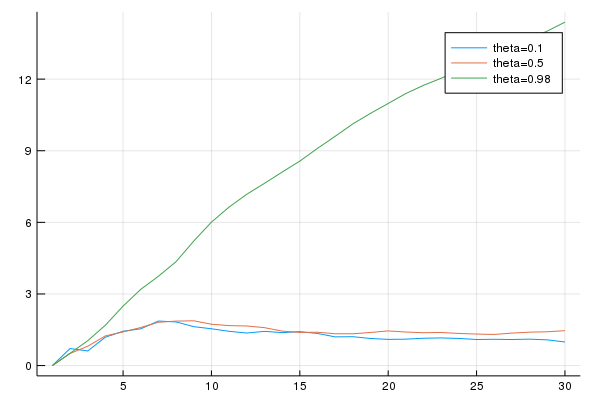

In [59]:
using Plots
gr(fmt=:png)

Θ=(0.1, 0.5, 0.98)
T=30

plot(1:T, rollingmean(genseries(Θ[1], 30)), label="theta=$(Θ[1])")
plot!(1:T, rollingmean(genseries(Θ[2], 30)), label="theta=$(Θ[2])")
plot!(1:T, rollingmean(genseries(Θ[3], 30)), label="theta=$(Θ[3])")
# Q: How do I broadcast the plot across all three series rather than calling plot, plot!, plot!? 

Note: var() does a sample-variance correction, so its output does not match the formula given for variance.
var(yT1) == sum(yT1 .^ 2 / length(yT1)) - sum(yT1 / length(yT1)) ^ 2 = false
var(yT1) == sum((yT1 .- mean(yT1)) .^ 2) / (length(yT1) - 1) = true
To make the code nicer, my figure labels report variance as calculated by var().


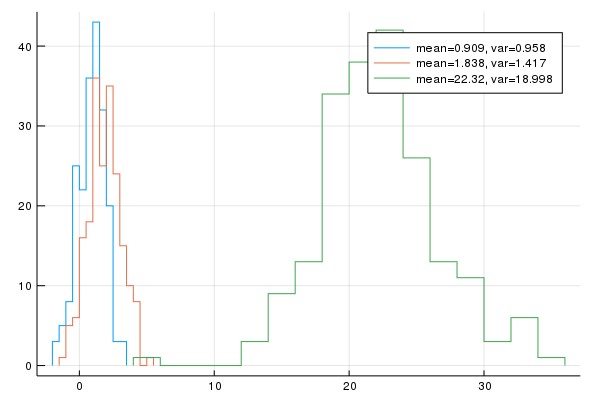

In [125]:
using Parameters

function simulateseries(params, n)
    @unpack θ, T, γ, σ, y₀ = params
    simulations = [genseries(θ, T, γ=γ, σ=σ, y₀=y₀) for _ in 1:n]
end        

paramgen = @with_kw (θ, T=30, γ=1, σ=1, y₀=0.0)

N=200

yTinstance = zeros(N)
yT = fill(yTinstance, 3)
label = fill("", 3)

for (i, θ) in enumerate(Θ)
    sims = simulateseries( paramgen(θ=θ), N )
    yT[i] = [sim[end] for sim in sims]
    label[i] = "mean=$(round(mean(yT[i]), digits=3)), var=$(round(var(yT[i]), digits=3))"
end

#@show mean(yT1)
println("Note: var() does a sample-variance correction, so its output does not match the formula given for variance.")
@show var(yT1)==sum(yT1.^2/length(yT1)) - sum(yT1/length(yT1))^2
@show var(yT1)==sum((yT1 .- mean(yT1)).^2) / (length(yT1)-1)
println("To make the code nicer, my figure labels report variance as calculated by var().")

stephist(yT[1], label=label[1])
stephist!(yT[2], label=label[2])
stephist!(yT[3], label=label[3])

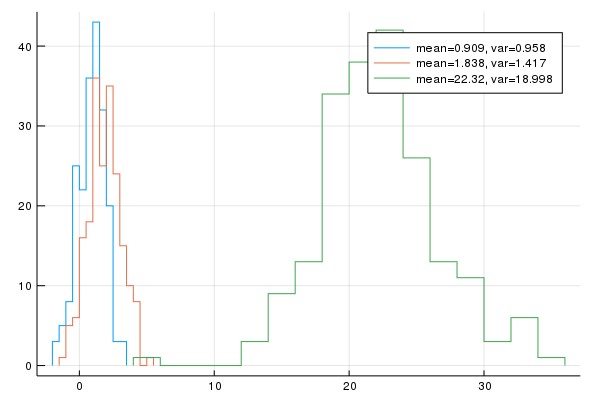

In [131]:
# Above I was trying to broadcast plot() and couldn't get it to work. However, passing an array to stephist() appears to work, because the code below generates the exact same hist:

stephist(yT[1:3], label=label[1:3])

# Suggests the following answer for simplifying my plot calls: 
# 1. build out each rollingmean series
# 2. save them all in a single array (of arrays)
# 3. save some labels in an array
# 4. pass those arrays to plot

### Exercise 3

Let the data generating process for a variable be

$$
y = a x_1 + b x_1^2 + c x_2 + d + \sigma w
$$

where $ y, x_1, x_2 $ are scalar observables, $ a,b,c,d $ are parameters to estimate, and $ w $ are iid normal with mean 0 and variance 1

First, lets simulate data we can use to estimate the parameters

- draw $ N=50 $ values for $ x_1, x_2 $ from iid normal distributions  


Then, simulate with different $ w $
* draw a $ w $ vector for the `N` values and then `y` from this simulated data if the parameters were $ a = 0.1, b = 0.2 c = 0.5, d = 1.0, \sigma = 0.1 $
* repeat that so you have `M = 20` different simulations of the `y` for the `N` values

Finally, calculate order least squares manually (i.e., putting the observables into matrices and vectors, and directly using the equations for [OLS](https://en.wikipedia.org/wiki/Ordinary_least_squares) rather than a package).

- for each of the `M=20` simulations, calculate the OLS estimates for $ a, b, c, d, \sigma $  
- plot a histogram of these estimates for each variable.  

In [404]:
N=50
M=20
params = (a=0.1, b=0.2, c=0.5, d=1.0, σ=0.1)

x1 = randn(N)
x2 = randn(N)

# some simple helper functions
dgp(x1, x2, a, b, c, d)  = a*x1 .+ b*x1.^2 .+ c*x2 .+ d
olscoeff(y, x) = (x'*x)\(x'*y)

function simulatey(x1, x2, params) # simulate N observations of y
    w = randn(N)
    @unpack a, b, c, d, σ = params
    dgp(x1, x2, a, b, c, d) + σ.*w
end

function repeatsims(M, x1, x2, params) # generate M sets of N observations on (Y, X)
    sims = fill(zeros(N), M)
    for i in 1:M
        sims[i]=simulatey(x1, x2, params)
    end
    return sims
end

function getestimates(y, z) # estimate coefficients for each independent variable 
    estimate = z'z\z'y
    push!(estimate, eststdev(y, z, estimate))
    return estimate
end    

function eststdev(y, z, est) # estimate σ based on observed y and coefficient estimates
    a = est[1]; b=est[2]; c=est[3]; d=est[4] #how to do this in a more generic fashion?
    err = y .- dgp(z[:,1], z[:,3], a, b, c, d)
    return sqrt(var(err)) 
end

exes = hcat(x1, x1.^2, x2, ones(N))
sims = repeatsims(M, x1, x2, params)
getestimates(sims[1][:], exes)

5-element Array{Float64,1}:
 0.09116126694818402
 0.20647685068692354
 0.5023358095447404 
 0.9707528631549787 
 0.11282797356328583

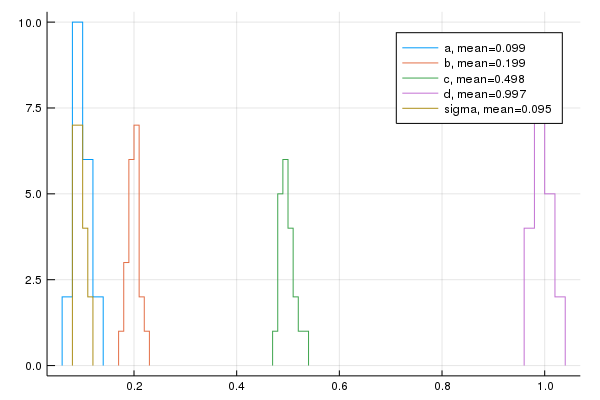

In [413]:
estimates=zeros(5,M)
for i in 1:M
    estimates[:,i] = getestimates(sims[i][:], exes)
end

stephist(estimates[1,:], label="a, mean=$(round(mean(estimates[1,:]), digits=3))")
stephist!(estimates[2,:], label="b, mean=$(round(mean(estimates[2,:]), digits=3))")
stephist!(estimates[3,:], label="c, mean=$(round(mean(estimates[3,:]), digits=3))")
stephist!(estimates[4,:], label="d, mean=$(round(mean(estimates[4,:]), digits=3))")
stephist!(estimates[5,:], label="sigma, mean=$(round(mean(estimates[5,:]), digits=3))")

It seems like there could be a more stylish way to store the estimates than a giant unlabelled matrix; perhaps output a tuple from getestimates(), create independent arrays for each parameter, and plot/take means over each array separately. But I already dislike how specifically my eststdev function is linked to the functional form of the dgp, and naming a tuple that getestimates() returns would similarly degeneralize that function. With more time to think it through, could probably untangle this and find a more elegant solution.

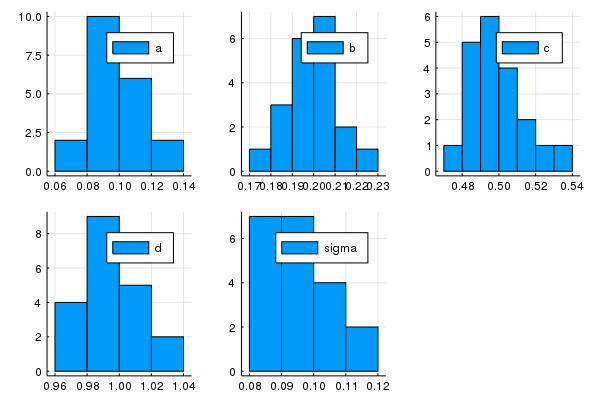

In [409]:
histogram(estimates', layout=5, label=["a" "b" "c" "d" "sigma"])

## Solutions

### Exercise 1

Here’s the iterative approach

In [134]:
function compute_asymptotic_var(A, Sigma;
                                S0 = Sigma * Sigma',
                                tolerance = 1e-6,
                                maxiter = 500)
    V = Sigma * Sigma'
    S = S0
    err = tolerance + 1
    i = 1
    while err > tolerance && i ≤ maxiter
        next_S = A * S * A' + V
        err = norm(S - next_S)
        S = next_S
        i += 1
    end
    return S
end

compute_asymptotic_var (generic function with 1 method)

In [273]:
A =     [0.8 -0.2;
        -0.1 0.7]
Sigma = [0.5 0.4;
         0.4 0.6]

2×2 Array{Float64,2}:
 0.5  0.4
 0.4  0.6

Note that all eigenvalues of $ A $ lie inside the unit disc:

In [136]:
maximum(abs, eigvals(A))

0.9

Let’s compute the asymptotic variance:

In [137]:
our_solution = compute_asymptotic_var(A, Sigma)

2×2 Array{Float64,2}:
 0.671228  0.633476
 0.633476  0.858874

In [274]:
solve_discrete_lyapunov(A, Sigma * Sigma')

2×2 Array{Float64,2}:
 0.671231  0.633474
 0.633474  0.858874

Now let’s do the same thing using QuantEcon’s solve_discrete_lyapunov() function and check we get the same result

In [138]:
using QuantEcon
norm(our_solution - solve_discrete_lyapunov(A, Sigma * Sigma'))

3.883245447999784e-6